# **Computational Drug Discovery-Lipinski's rules**

Jesica Allende

[*LinkedIn Profile*](https://iplogger.com/2hKMx4),  [*GitHub*](https://iplogger.com/22A9e6).

In the previous section, we discovered a set of compounds that inhibit melanoma-associated antigen-4.

However, in this section, we will try to find out whether these compounds satisfy Lipinski's rules for pre-clinical uses.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-07-02 19:43:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   193MB/s    in 0.4s    

2023-07-02 19:43:54 (193 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 28 kB/s 


## **Load bioactivity data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Lipinskis_rules_bioactivity_data_melanoma-associated_antigen-4_A.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,value
0,CHEMBL5188864,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2211.80
1,CHEMBL5202217,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,intermediate,6183.70
2,CHEMBL5174657,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)NC(=O)CSC[C@@H]...,intermediate,1892.70
3,CHEMBL5175748,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2227.95
4,CHEMBL5174081,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,inactive,10000.00
5,CHEMBL5208599,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(C)...,inactive,10000.00
6,CHEMBL5188210,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,active,2.15
7,CHEMBL5187815,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1.00
8,CHEMBL5199001,CC(C)C[C@@H]1NC(=O)[C@H]([C@H](C)O)NC(=O)[C@H]...,active,1.26
9,CHEMBL5208958,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,active,10.60


## **Calculate Lipinski components**
**Christopher Lipinski** is a medicinal chemist and received his Ph.D. in physical organic chemistry from the University of California, Berkeley in 1968.

Lipinski components, also known as the Lipinski's Rule of Five, are a set of four simple molecular properties used to evaluate the **druglikeness** and **pharmacokinetic** properties of small organic molecules.

The four Lipinski rules are:

*   _Molecular weight (Wt) ≤ 500 Dalton_
*   _Octanol-water partition coefficient (logP) ≤ 5_
*   _Hydrogen bond donors (NumHDonors) ≤ 5_
*   _Hydrogen bond acceptors (NumHAcceptors) ≤ 10_

A molecular weight ≤ 500 Dalton ensure that the compound is small enough for efficient absorption and distribution in the body.

The lipophilicity, logP, measures the compound's ability to dissolve in both water (hyhilic) and oil (lipophilic). A lower logP value suggests better water solubility and favorable pharmacokinetic properties.

The number of hydrogen bond donor groups, usually represented by the presence of OH or NH functional groups, is related to the compound's ability to form strong interactions with target proteins, whereas the number of hydrogen bond acceptor groups, usually represented by the presence of oxygen or nitrogen atoms, relates to the compound's ability to form favorable interactions with biological targets.

The Lipinski statements are not strict rules but rather guidelines to assess the druglikeness of compounds. They help identify compounds that are likely to have good oral bioavailability and permeability. However, it's important to note that these rules are not applicable to all types of molecules or therapeutic targets and should be used in conjunction with other considerations in drug discovery and development.

### **Import libraries**

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Now, we will explore and combine two dataframes, df_lipinski and df.

In [ ]:
df_lipinski.head(4)

,MW,LogP,NumHDonors,NumHAcceptors
0,1356.488,-4.44343,20.0,19.0
1,1356.488,-4.44343,20.0,19.0
2,1306.472,-4.34563,19.0,18.0
3,1204.375,-2.11183,17.0,16.0


In [ ]:
df.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,value
0,CHEMBL5188864,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2211.80
1,CHEMBL5202217,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,intermediate,6183.70
2,CHEMBL5174657,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)NC(=O)CSC[C@@H]...,intermediate,1892.70
3,CHEMBL5175748,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2227.95


Let's combine the 2 dataframes shown above in df_combined.

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL5188864,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2211.80,1356.488,-4.44343,20.0,19.0
1,CHEMBL5202217,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,intermediate,6183.70,1356.488,-4.44343,20.0,19.0
2,CHEMBL5174657,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)NC(=O)CSC[C@@H]...,intermediate,1892.70,1306.472,-4.34563,19.0,18.0
3,CHEMBL5175748,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2227.95,1204.375,-2.11183,17.0,16.0
4,CHEMBL5174081,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,inactive,10000.00,1147.323,-1.22803,16.0,15.0
5,CHEMBL5208599,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(C)...,inactive,10000.00,1400.585,-3.21433,21.0,19.0
6,CHEMBL5188210,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,active,2.15,1398.569,-3.41723,20.0,19.0
7,CHEMBL5187815,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1.00,1905.198,-4.32506,28.0,26.0
8,CHEMBL5199001,CC(C)C[C@@H]1NC(=O)[C@H]([C@H](C)O)NC(=O)[C@H]...,active,1.26,1656.935,-6.29276,24.0,22.0
9,CHEMBL5208958,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,active,10.60,1355.544,-2.27273,19.0,18.0


_Note: Remember, **value** is the IC50 in nM._

####Unfortunately, as we can see below, none of the above compounds satisfy Lipinski's first rule, which states that the molecular weight of a compound must be less than 500 Da to ensure efficient absorption and distribution in the body.

In [ ]:
max_value = df_combined["MW"].max()
min_value = df_combined["MW"].min()

print(f"Maximum MW value: {max_value}")
print(f"Minimum MW value: {min_value}")

Maximum MW value: 1905.1980000000008
Minimum MW value: 1147.3230000000005


### **Convert IC50 to pIC50**
Here,  we will convert **IC50** to the negative logarithmic scale which is **-log10(IC50)**, pIC50.

The IC50 is a concentration at which a drug inhibits a biological process by 50%.

Representing the data as pIC50 values improves understanding in data representation. For example,

IC50 = 10$^{-6}$ M is equivalent to pIC50 = 6.0.

IC50 = 10$^{-7}$ M is equivalent to pIC50 = 7.0.

IC50 = 10$^{-8}$ M is equivalent to pIC50 = 8.0.

As we can see, pIC50 is more intuitive. A component with a high pIC50 value indicates a strong inhibitory action.

The function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``value`` column and converts them from nM to M by multiplying the value by 10$^{-9}$.
* Take the molar value and apply -log10.
* And create a new ``pIC50`` column.

In [ ]:
def calculate_pIC50(df):
    molar_values = df['value'] * 10**-9  # Convert value_norm from nM to M
    pIC50 = -np.log10(molar_values)  # Calculate pIC50 values

    df['pIC50'] = pIC50  # Add pIC50 column to the DataFrame

    return df

df_combined = calculate_pIC50(df_combined)


Let´s first apply the norm_value() function so that the values in the value column are normalized.

In [ ]:
def normalize_column(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    df['value_norm'] = (df[column] - min_value) / (max_value - min_value)

normalize_column(df_combined, 'value')



In [ ]:
df_combined.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,value,MW,LogP,NumHDonors,NumHAcceptors,pIC50,value_norm
0,CHEMBL5188864,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2211.80,1356.488,-4.44343,20.0,19.0,5.655254,0.221102
1,CHEMBL5202217,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,intermediate,6183.70,1356.488,-4.44343,20.0,19.0,5.208752,0.618332
2,CHEMBL5174657,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)NC(=O)CSC[C@@H]...,intermediate,1892.70,1306.472,-4.34563,19.0,18.0,5.722918,0.189189
3,CHEMBL5175748,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,intermediate,2227.95,1204.375,-2.11183,17.0,16.0,5.652095,0.222717


In [ ]:
df_combined.describe()

,value,MW,LogP,NumHDonors,NumHAcceptors,pIC50,value_norm
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2119.721875,1368.867063,-3.375307,19.562500,18.500000,6.775732,0.211893
std,3469.885280,180.425148,1.286693,2.943213,2.556039,1.384314,0.347023
min,1.000000,1147.323000,-6.292760,16.000000,15.000000,5.000000,0.000000
25%,13.075000,1295.210750,-4.345630,17.750000,17.750000,5.654464,0.001208
50%,168.845000,1343.533000,-3.288730,19.000000,18.000000,6.775994,0.016786
75%,2215.837500,1367.008250,-2.563633,20.000000,19.000000,7.886412,0.221506
max,10000.000000,1905.198000,-1.228030,28.000000,26.000000,9.000000,1.000000


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the bioactivity classes**

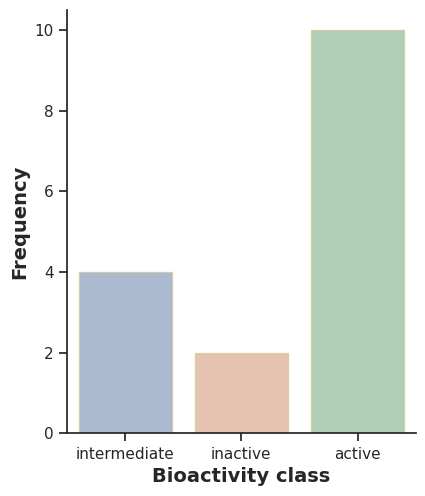

In [ ]:
plt.figure(figsize=(4.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_combined, edgecolor='y', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

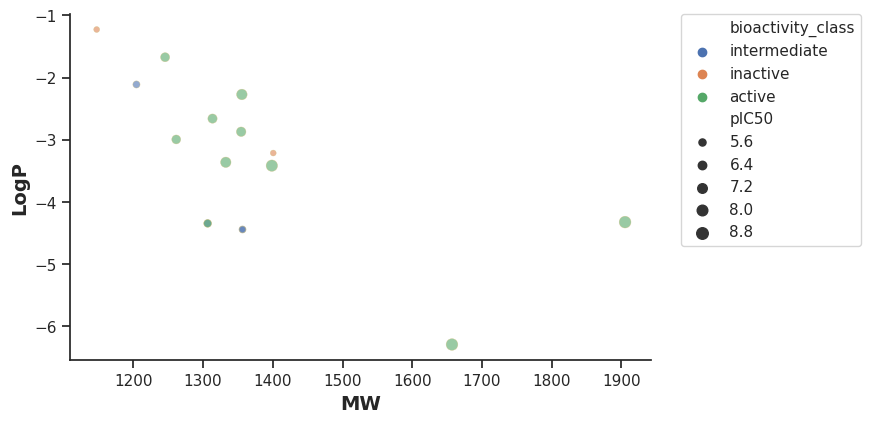

In [ ]:
plt.figure(figsize=(7.5, 4.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined, hue='bioactivity_class', size='pIC50', edgecolor='y', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

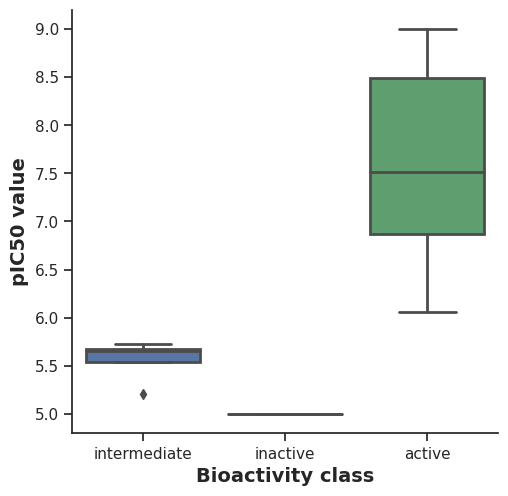

In [ ]:
plt.figure(figsize=(5.5, 5.5))

boxplot = sns.boxplot(x='bioactivity_class', y='pIC50', data=df_combined, linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

######_Note: Remember compounds with IC50 of less than or equal to 1000 nM were considered active while those greater than or equal to 7000 nM were considered inactive. As for those values between 1000 and 7000 nM were referred to as intermediate._

**Statistical analysis | Kruskal-Wallis Test**

The Kruskal-Wallis test is a non-parametric test used to compare the medians of three or more independent groups. It does not assume a specific distribution but the samples have identical distribution. This test can handle unequal sample sizes and the null hypothesis is that there is no significant difference between the medians of the groups being compared.

In [ ]:
from scipy.stats import kruskal

def kruskal_wallis(descriptor, verbose=False):
    selection = [descriptor, 'bioactivity_class']
    df = df_combined[selection]

    # Create separate groups based on bioactivity_class
    groups = [df[df['bioactivity_class'] == 'active'][descriptor],
              df[df['bioactivity_class'] == 'intermediate'][descriptor],
              df[df['bioactivity_class'] == 'inactive'][descriptor]]

    # Perform the Kruskal-Wallis test
    stat, p = kruskal(*groups)

    # Interpret the test results
    alpha = 0.05
    if p > alpha:
        interpretation = 'No significant difference between groups (fail to reject H0)'
    else:
        interpretation = 'Significant difference between groups (reject H0)'

    # Store the results in a DataFrame and save to a CSV file
    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistics': stat,
                            'p': p,
                            'alpha': alpha,
                            'Interpretation': interpretation}, index=[0])
    filename = 'kruskal_wallis_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

kruskal_wallis('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,11.134021,0.003822,0.05,Significant difference between groups (reject H0)


In [ ]:
print('Kruskal-Wallis Test Results:')
print('-----------------------------')
print('Statistics:', stat)
print('p-value:', p)
print('Interpretation:', interpretation)


Kruskal-Wallis Test Results:
-----------------------------
Statistics: 11.134020618556708
p-value: 0.003821889637084586
Interpretation: Significant difference between at least two groups (reject H0)


---
_At least two groups (active, intermediate, inactive) differ significantly from
each other._

---



### For learning purposes, let's use another statistical analysis to find out significant differences between groups.

**Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups. It assesses whether the distributions of two samples differ significantly in terms of their medians. The test calculates a U statistic by ranking the combined data from both groups and compares it to the expected distribution under the null hypothesis of no difference. It is commonly used when comparing groups with small sample sizes or non-normal data.

Let's compare **active** with **intermediate**.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and intermediate
  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  intermediate = df[df.bioactivity_class == 'intermediate']
  intermediate = intermediate[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, intermediate)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,40.0,0.001998,0.05,Different distribution (reject H0)


Let's compare **active** with **inactive**.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,20.0,0.040904,0.05,Different distribution (reject H0)


Let's compare **intermediate** with **inactive**.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# intermediate and inactives

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  intermediate = df[df.bioactivity_class == 'intermediate']
  intermediate = intermediate[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(intermediate, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,8.0,0.10021,0.05,Same distribution (fail to reject H0)


---

_Intermediate and inactive do not differ significantly from each other, while active and inactive and active and intermediate do._


---

####Lipinski's descriptors

**Statistical analysis | Kruskal-Wallis Test**

#### **MW**

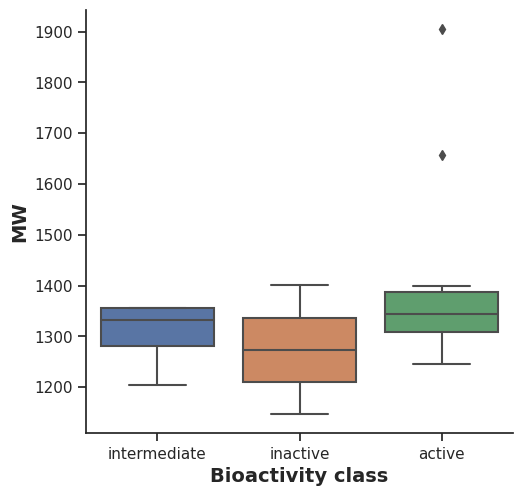

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_combined)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
kruskal_wallis('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.357327,0.836387,0.05,No significant difference between groups (fail...


---
The groups active, intermediate, and inactive, do not differ significantly from each other.

---

#### **LogP**

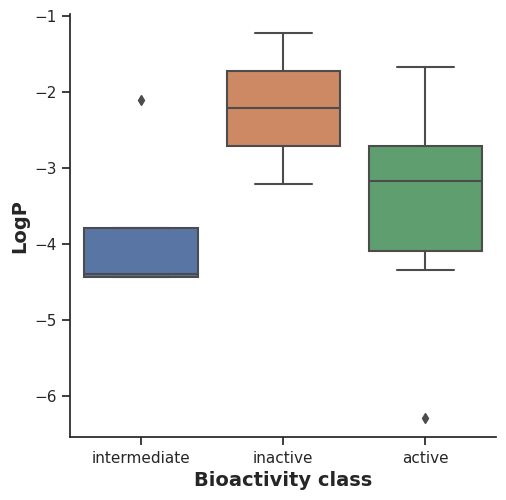

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_combined)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
kruskal_wallis('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2.786029,0.248326,0.05,No significant difference between groups (fail...


---
The groups active, intermediate, and inactive, do not differ significantly from each other.

---

#### **NumHDonors**

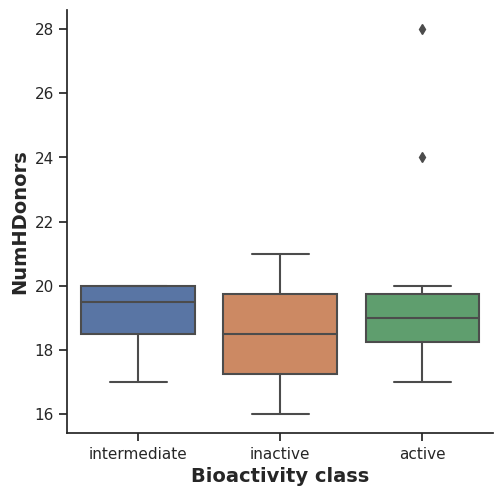

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_combined)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
kruskal_wallis('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.108129,0.947371,0.05,No significant difference between groups (fail...


---
The groups active, intermediate, and inactive, do not differ significantly from each other.

---

#### **NumHAcceptors**

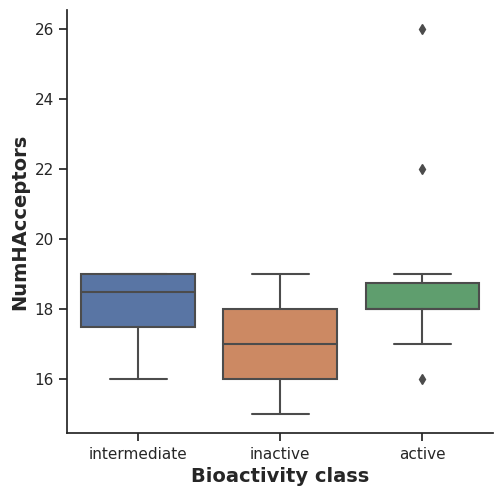

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
kruskal_wallis("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.33123,0.847372,0.05,No significant difference between groups (fail...


---
The groups active, intermediate, and inactive, do not differ significantly from each other.

---

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Looking at the pIC50 values, **intermediate** and **inactive** do not differ significantly from each other, while **active** and **inactive** and **active** and **intermediate** do.

The threshold values we used to define bioactivity were:

``IC50 <= 1,000 nM = active,``

``IC50 >= 7,000 nM = inactive, and``

``1,000 nM < IC50 < 7,000 nM = intermediate``

``(Corresponding to pIC50 >= 6.0 = active, pIC50 <= 5.2 = inactive, and``       
``5.2 < pIC50 < 6 = intermediate)``


######**Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all of them  showed **no difference** between the **active**, **intermediate**, and **inactive** groups.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: kruskal_wallis_NumHAcceptors.csv (deflated 14%)
  adding: Lipinskis_rules_bioactivity_data_melanoma-associated_antigen-4_A.csv (deflated 88%)
  adding: kruskal_wallis_MW.csv (deflated 14%)
  adding: kruskal_wallis_LogP.csv (deflated 13%)
  adding: kruskal_wallis_pIC50.csv (deflated 15%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 14%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 28%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: kruskal_wallis_NumHDonors.csv (deflated 15%)
  adding: plot_MW.pdf (deflated 35%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
